# Titanic

VARIABLE| DESCRIPTIONS: 
---------|--------------------------
survival | Survival (0 = No; 1 = Yes) 
pclass   | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name     | Name
sex      | Sex
age      | Age
sibsp    |   Number of Siblings/Spouses Aboard
parch    |  Number of Parents/Children Aboard
ticket | Ticket Number
fare | Passenger Fare
cabin | Cabin
embarked | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
- Pclass is a proxy for socio-economic status (SES)
1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

- Age is in Years; Fractional if Age less than One (1)
If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored. The following are the definitions used
for sibsp and parch.

- Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
- Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
- Parent: Mother or Father of Passenger Aboard Titanic
- Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws. Some children travelled
only with a nanny, therefore parch=0 for them. As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Limpando

_Aplicando Fare de acordo com a classe para fare null ou zerados_

In [5]:
df.Fare = df.Fare.map(lambda x: np.nan if x == 0 else x)

In [6]:
classmeans = pd.pivot_table(df, 'Fare', 'Pclass', aggfunc='mean')
classmeans

Pclass
1    86.148874
2    21.358661
3    13.787875
Name: Fare, dtype: float64

In [7]:
df.Fare = df[['Fare', 'Pclass']].apply(lambda x: classmeans[x['Pclass']] if pd.isnull(x['Fare']) else x['Fare'], axis=1)

_Aplicando media para cada valor null de Age_

In [8]:
media = np.mean(df.Age)
df.Age = df.Age.fillna(media)

_Aplicando valor 'Unknown' para valores null da Cabin_

In [9]:
df.Cabin = df.Cabin.fillna('Unknown')

_Aplicando moda para cada valor null em Embarked_

In [10]:
moda = df['Embarked'].mode()[0]
df.Embarked.fillna(moda, inplace=True)

### Visualizar

In [11]:
import matplotlib as plt

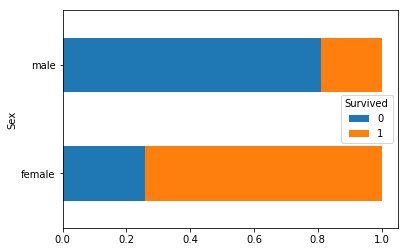

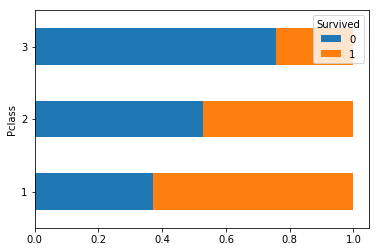

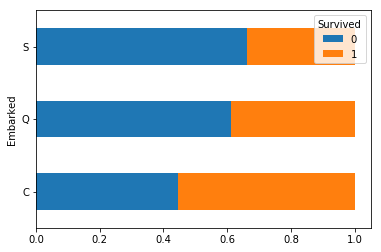

In [12]:
def proportionSurvived(var):
    by_var = df.groupby([var,'Survived']) 
    table = by_var.size().unstack()
    return table.div(table.sum(1), axis=0) 
 
var_lst = ['Sex', 'Pclass', 'Embarked']

for var in var_lst: 
    table = proportionSurvived(var)
    table.plot(kind='barh', stacked=True)
    


In [13]:
bins = [0, 5, 15, 25, 40, 60, 100]
binNames = ['Young Child', 'Child', 'Young Adult', 'Adult', 'Middle Aged', 'Older']
binAge = pd.cut(df.Age, bins, labels = binNames)

In [14]:
fareNames = ['Cheap', 'Middle', 'Expensive']
binFare = pd.qcut(df.Fare, 3, labels=fareNames)

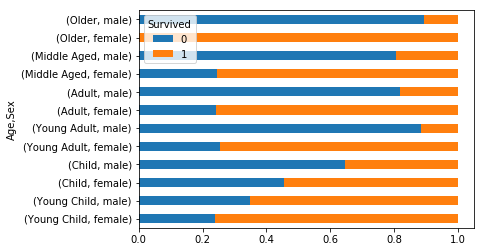

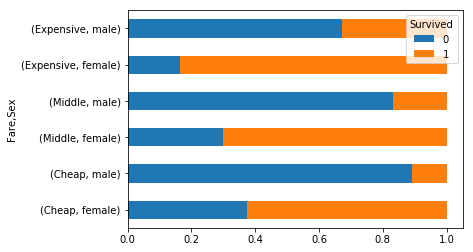

In [15]:
bin_vars = [binAge, binFare]
for i in range(2):
    group = df.groupby([bin_vars[i], 'Sex', 'Survived']).size().unstack()
    group = group.div(group.sum(1), axis=0)
    ax = group.plot(kind='barh', stacked=True)

### Train


In [16]:
df.drop('Ticket', inplace=True, axis=1)

In [18]:
df.drop('Name', inplace=True, axis=1)

ValueError: labels ['Name'] not contained in axis

In [21]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,Unknown,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,Unknown,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,Unknown,S


#### Features

In [22]:
dados = df.values
X = dados[:, 2:]
X

array([[3, 'male', 22.0, ..., 7.25, 'Unknown', 'S'],
       [1, 'female', 38.0, ..., 71.2833, 'C85', 'C'],
       [3, 'female', 26.0, ..., 7.925, 'Unknown', 'S'],
       ..., 
       [3, 'female', 29.69911764705882, ..., 23.45, 'Unknown', 'S'],
       [1, 'male', 26.0, ..., 30.0, 'C148', 'C'],
       [3, 'male', 32.0, ..., 7.75, 'Unknown', 'Q']], dtype=object)

#### Labels

In [23]:
y = dados[:, 0:2]
y

array([[1, 0],
       [2, 1],
       [3, 1],
       ..., 
       [889, 0],
       [890, 1],
       [891, 0]], dtype=object)

In [31]:
from sklearn import tree

In [33]:
arvore = tree.DecisionTreeClassifier()

In [ ]:
arvore.fit()